In [12]:
import csv

with open('youtube_data.csv', 'r') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        print(row)

['Content', 'video_title', 'Video publish time', 'views']
['Total', '', '', '2811051']
['c9bw-s1JYEA', "Dream's Mannequin Prank (SUS) (Dreamnotfound Animation) #minecraft #sus #cursed", 'Aug 31, 2024', '349252']
['4HRoknbTl1A', "What's The Point Of The MASK??? [Dreamnotfound Minecraft Animation] #shorts #sus #dream", 'Mar 16, 2024', '288905']
['tUzJOAMwdok', "Dream's new challenge be like (Fridge in Nuke Explosion) #minecraft #dream #georgenotfound", 'Oct 23, 2024', '124621']
['IWiPMhzdZrI', 'GeorgeNotFound Stuck at SUS Elevator Animation', 'May 15, 2022', '120739']
['eSCcCFSHKko', 'Sapnap Is Giving Away SUSSY Cereals For A Limited Time! | #ohdreamsgiveaway Animation', 'Jul 10, 2022', '115644']
['mfFnW36jKDg', "Dream 'Tortures' GeorgeNotFound... But It's SUS | Dream SMP Animation", 'Feb 5, 2022', '113595']
['tTdUtb2XQ_0', "Sapnap's Sad Anime AMONG US Eye #shorts", 'Oct 14, 2022', '110250']
['CwhO_zojQmU', "Dream is GeorgeNotFound's (Dreamnotfound Animation) #sus #dream #georgenotfound"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


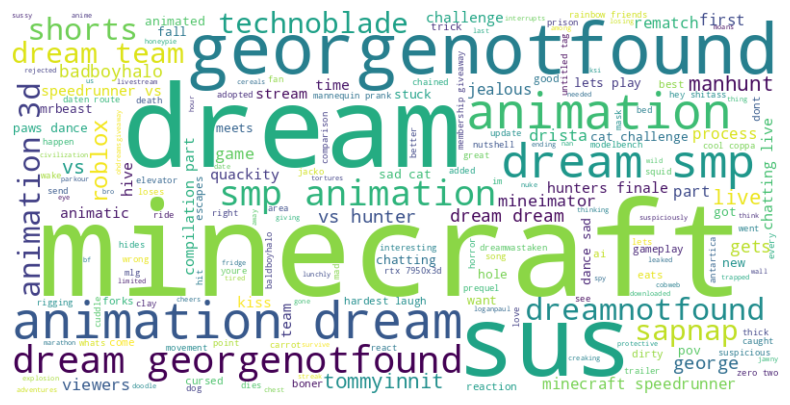

Kata kunci terbaik:
- minecraft
- dream
- sus
- georgenotfound
- animation dream


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer

# Download stopwords for Indonesian text preprocessing
nltk.download('stopwords')

# Load data from youtube_data.csv
df = pd.read_csv("youtube_data.csv")

# --- Preprocessing text judul video ---
def preprocess_text(text):
    # Check if the input is a float (potential non-string value)
    if isinstance(text, float):
        # Convert float to string (handle potential integer floats)
        text = str(int(text)) if text.is_integer() else str(text)

    text = text.lower()  # Case folding (convert to lowercase)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove non-alphanumeric characters
    text = ' '.join([word for word in text.split() if word not in stopwords.words('indonesian')])  # Remove Indonesian stopwords
    return text

# Apply the preprocessing function to the 'video_title' column
df['processed_title'] = df['video_title'].apply(preprocess_text)

# --- Feature extraction with TF-IDF ---
vectorizer = TfidfVectorizer()  # Initialize TF-IDF vectorizer
tfidf_matrix = vectorizer.fit_transform(df['processed_title'])  # Create TF-IDF matrix from processed titles

# --- Sentence Embeddings with SentenceTransformer ---
model = SentenceTransformer('all-mpnet-base-v2')  # Initialize SentenceTransformer model
sentence_embeddings = model.encode(df['processed_title'].tolist())  # Generate sentence embeddings

# Word cloud for keyword visualization
text = ' '.join(df['processed_title'].tolist())  # Combine all titles into a single string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  # Generate word cloud
plt.figure(figsize=(10, 5))  # Set figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Display the word cloud
plt.axis('off')  # Hide axes
plt.show()  # Show the plot

# --- Extract top keywords ---
top_keywords = list(wordcloud.words_.keys())[:5]  # Get top 5 keywords from the word cloud

print("Kata kunci terbaik:")  # Print "Top keywords:"
for word in top_keywords:
    print(f"- {word}")  # Print each keyword

# --- Save top keywords ---
df_top_keywords = pd.DataFrame(top_keywords)
df_top_keywords.to_csv("top_keywords.csv", index=False)  # Save the generated titles

____
Load Generative model

In [21]:
import pandas as pd
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# --- Load the fine-tuned GPT-2 model ---
model_name = "EdwardFang09/QuestionableYouTubeVideoTitleV1"  # Path to your fine-tuned model
tokenizer = AutoTokenizer.from_pretrained(model_name)  # Load the tokenizer
model = AutoModelForCausalLM.from_pretrained(model_name)  # Load the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Set device (GPU or CPU)
model.to(device)  # Move model to the device


def generate_titles(top_keywords):
    """
    Generates YouTube titles based on a list of keywords using a fine-tuned GPT-2 model.

    Args:
      top_keywords: A list of keywords to use as prompts for title generation.

    Returns:
      A list of generated YouTube titles.
    """
    titles = []
    for word in top_keywords:
        prompt = word  # Use the keyword as a prompt for GPT-2

        # Include attention_mask
        input_ids = tokenizer(prompt, return_tensors="pt", padding=True).to(device)  # Tokenize the prompt

        # Set pad_token_id
        tokenizer.pad_token = tokenizer.eos_token  # Set padding token

        # Generate title with GPT-2
        output = model.generate(
            input_ids=input_ids.input_ids,  # Input IDs
            attention_mask=input_ids.attention_mask,  # Attention mask
            max_length=100,  # Maximum length of generated title
            num_return_sequences=1,  # Number of titles to generate
            pad_token_id=tokenizer.eos_token_id  # Padding token ID
        )
        generated_text = tokenizer.decode(output[0], skip_special_tokens=True)  # Decode the generated title
        titles.append(generated_text)  # Add the title to the list

    return titles


# --- Load keywords from CSV ---
df_top_keywords = pd.read_csv("top_keywords.csv")
top_keywords = df_top_keywords['0'].tolist()  # Assuming the keywords are in the first column

# --- Generate titles ---
titles = generate_titles(top_keywords)
titles = list(set(titles))  # Remove redundant titles

# --- Save results ---
df_titles = pd.DataFrame(titles)
df_titles.to_csv("generated_titles.csv", index=False)  # Save the generated titles

Outputs

Top keywords

In [23]:
top_keywords

['minecraft', 'dream', 'sus', 'georgenotfound', 'animation dream']

High Quality titles

In [22]:
# --- Generate high quality titles ---
print("\nIde judul: ")
for i in range(0,len(top_keywords)):
    #print(f"{((top_keywords)[i])}: {titles[i]}")
    print(f"{titles[i]}")


Ide judul: 
dream Dream Team + SMP Animation 2021 Compilation Part 3
sus [Dreamnotfound Animation] 3D
georgenotfound's "Wo Wap! Animation" - Live Stream (Don't forget to send us a message!)
animation dream (SAD) Animation | Dream SMP
minecraft�� [ROBLOX] Roblox: The Animation (with the viewers!) (Dream SMP & Team Minecraft) #minecraft #dream #georgenotfound
